# Bridging the Bureaucracy-Agility Divide: Research Analysis Notebook

## A Hybrid Framework for AI-Driven Customs Modernisation in Bangladesh

**Authors:** Sushanta Paul, Anmita Das, Shoumya Chowdhury

---

This notebook provides complete reproducibility of the statistical analyses presented in the research paper. It includes:

1. **Data Loading & Preprocessing**
2. **Demographic Analysis** (Section A)
3. **Project Characteristics** (Section B)
4. **Reliability Analysis** (Cronbach's Alpha)
5. **Descriptive Statistics** (Sections C-I)
6. **Inferential Statistics** (t-tests, ANOVA, correlations)
7. **Visualizations**
8. **Summary of Key Findings**

## 1. Setup and Data Loading

In [1]:
# Install required packages if not already installed
# !pip install pandas numpy scipy matplotlib seaborn

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.precision', 3)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Load the survey data
df = pd.read_csv('survey_responses.csv')

print(f"Total responses: {len(df)}")
print(f"\nColumns in dataset: {len(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Total responses: 130

Columns in dataset: 54

First few rows:


,ResponseID,A1_Role,A2_Experience,A3_Involvement,A4_Projects,B1_Size,B2_Vendor,B3_Approach,C1,C2,C3,C4,C5,C6,C7,C8,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,G6,G7,H1,H2,H3,H4,I1,I2,I3,I4_Score,J1_Mistakes,J2_Success,J3_Failed,J4_Features,J5_Comments
0,1,BCS (Customs & VAT) cadre officer,More than 15 years,"Yes, as project manager / team leader",National single window / trade portal; Customs...,"Large (multi-year, national rollout)",High - primarily vendor-driven,No formal method was specified,3,3,4,3,3,4,3,2,2,2,3,1,2,3,4,3,3,5,4,4,3,4,3,4,4,4,5,4,4,5,3,4,3,2,2,2,4,2,2,3,6,Unrealistic timelines and budgets set by senio...,E-payment system pilot at Chittagong port was ...,National trade portal rollout without pilot fa...,"Pilot-first approach mandatory, customs domain...",Customs should establish a dedicated ICT proje...
1,2,BCS (Customs & VAT) cadre officer,0-5 years,"Yes, as core project team member",Customs automation system (e.g. ASYCUDA / nati...,"Medium (6-18 months, multiple stakeholders)",High - primarily vendor-driven,Hybrid approach (combination of structured pha...,2,3,2,2,3,3,3,2,2,3,2,2,2,4,5,4,4,4,3,4,5,5,3,5,4,4,3,4,5,5,4,4,4,3,2,3,5,3,3,2,7,Frequent scope creep and requirement changes d...,Electronic bond management system succeeded at...,AI-powered valuation system rejected by trader...,"Knowledge transfer tied to payments, Bangla do...",Better coordination with international best pr...
2,3,ICT / IT professional (vendor / private firm),6-10 years,"Yes, as project manager / team leader",Customs automation system (e.g. ASYCUDA / nati...,"Large (multi-year, national rollout)",High - primarily vendor-driven,"Mainly agile / iterative (short sprints, incre...",4,3,3,2,3,3,3,3,4,3,3,3,2,4,5,4,5,4,4,5,5,4,5,4,5,5,4,4,4,3,4,3,4,3,2,2,3,4,3,4,7,Inadequate budget allocation for proper testin...,E-payment system pilot at Chittagong port was ...,AI-based anomaly detection system had high fal...,"Clear acceptance criteria for each iteration, ...",Importance of data governance framework cannot...
3,4,Other NBR/customs official,More than 15 years,"Yes, as end-user / stakeholder (training, pilo...",Risk management / risk scoring system; E-payme...,"Small (less than 6 months, small project team)",High - primarily vendor-driven,No formal method was specified,3,2,2,3,3,3,3,2,3,2,4,3,2,4,5,5,4,5,5,5,5,4,4,4,4,4,5,5,5,4,5,5,4,2,1,2,5,2,2,3,7,Poor coordination between customs operational ...,Mobile app for customs declaration submission ...,Comprehensive cargo tracking system failed bec...,"Knowledge transfer tied to payments, Bangla do...",Balance between agility and structure is key. ...
4,5,Other NBR/customs official,6-10 years,"Yes, as core project team member",National single window / trade portal; E-payme...,"Large (multi-year, national rollout)",High - primarily vendor-driven,Hybrid approach (combination of structured pha...,2,3,3,2,3,3,2,3,3,3,2,2,3,5,5,5,5,5,5,4,5,4,4,4,5,3,4,5,5,5,4,4,5,2,2,1,5,2,2,2,7,Weak change management and training. Systems a...,Automated invoice verification module worked b...,AI-based anomaly detection system had high fal...,Mandatory pilot phase clause before national r...,Importance of data governance framework cannot...


## 2. Demographic Analysis (Section A)

In [3]:
# A1: Current Role Distribution
print("="*60)
print("A1. CURRENT ROLE DISTRIBUTION")
print("="*60)

role_counts = df['A1_Role'].value_counts()
role_pct = df['A1_Role'].value_counts(normalize=True) * 100

role_df = pd.DataFrame({
    'Role': role_counts.index,
    'Count (n)': role_counts.values,
    'Percentage (%)': role_pct.values.round(1)
})
print(role_df.to_string(index=False))

# A2: Years of Experience Distribution
print("\n" + "="*60)
print("A2. YEARS OF EXPERIENCE DISTRIBUTION")
print("="*60)

exp_counts = df['A2_Experience'].value_counts()
exp_pct = df['A2_Experience'].value_counts(normalize=True) * 100

exp_df = pd.DataFrame({
    'Experience': exp_counts.index,
    'Count (n)': exp_counts.values,
    'Percentage (%)': exp_pct.values.round(1)
})
print(exp_df.to_string(index=False))

A1. CURRENT ROLE DISTRIBUTION
                                                     Role  Count (n)  Percentage (%)
                        BCS (Customs & VAT) cadre officer         45            34.6
                               Other NBR/customs official         25            19.2
Trade professional (importer / exporter / customs broker)         25            19.2
            ICT / IT professional (vendor / private firm)         22            16.9
                                    Academic / researcher          8             6.2
                       ICT / IT professional (government)          5             3.8

A2. YEARS OF EXPERIENCE DISTRIBUTION
        Experience  Count (n)  Percentage (%)
More than 15 years         48            36.9
        6-10 years         34            26.2
       11-15 years         31            23.8
         0-5 years         17            13.1


## 3. Reliability Analysis (Cronbach's Alpha)

In [4]:
def cronbach_alpha(items_df):
    """Calculate Cronbach's Alpha for a set of items."""
    items_df = items_df.dropna()
    n_items = items_df.shape[1]
    if n_items < 2:
        return np.nan
    item_variances = items_df.var(axis=0, ddof=1)
    total_scores = items_df.sum(axis=1)
    total_variance = total_scores.var(ddof=1)
    alpha = (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)
    return alpha

def interpret_alpha(alpha):
    """Interpret Cronbach's alpha value."""
    if alpha >= 0.9: return "Excellent"
    elif alpha >= 0.8: return "Good"
    elif alpha >= 0.7: return "Acceptable"
    elif alpha >= 0.6: return "Questionable"
    else: return "Poor"

# Define scales and their items
scales = {
    'Section C: Current PM Practices': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'],
    'Section D: AI-Specific Aspects': ['D1', 'D2', 'D3', 'D4', 'D5'],
    'Section E: Perceived Challenges': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
    'Section F: Attitudes to Hybrid': ['F1', 'F2', 'F3', 'F4', 'F5'],
    'Section G: Framework Elements': ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7'],
    'Section H: Training & Change Mgmt': ['H1', 'H2', 'H3'],
    'Section I: Outcomes': ['I1', 'I2', 'I3']
}

print("="*70)
print("CRONBACH'S ALPHA RELIABILITY COEFFICIENTS")
print("="*70)
print(f"{'Scale':<45} {'Items':>6} {'Alpha':>8} {'Interpretation':>15}")
print("-"*70)

reliability_results = []
for scale_name, items in scales.items():
    scale_df = df[items]
    alpha = cronbach_alpha(scale_df)
    interpretation = interpret_alpha(alpha)
    reliability_results.append({'Scale': scale_name, 'Items': len(items), 'Alpha': alpha, 'Interpretation': interpretation})
    print(f"{scale_name:<45} {len(items):>6} {alpha:>8.3f} {interpretation:>15}")

print("-"*70)
print("\nNote: α ≥ 0.70 is generally considered acceptable for research purposes.")

CRONBACH'S ALPHA RELIABILITY COEFFICIENTS
Scale                                          Items    Alpha  Interpretation
----------------------------------------------------------------------
Section C: Current PM Practices                    8    0.819            Good
Section D: AI-Specific Aspects                     5    0.713      Acceptable
Section E: Perceived Challenges                    8    0.795      Acceptable
Section F: Attitudes to Hybrid                     5    0.749      Acceptable
Section G: Framework Elements                      7    0.756      Acceptable
Section H: Training & Change Mgmt                  3    0.756      Acceptable
Section I: Outcomes                                3    0.732      Acceptable
----------------------------------------------------------------------

Note: α ≥ 0.70 is generally considered acceptable for research purposes.


## 4. Descriptive Statistics (Sections C-I)

In [5]:
# Define item labels
c_items = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
d_items = ['D1', 'D2', 'D3', 'D4', 'D5']
e_items = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8']
f_items = ['F1', 'F2', 'F3', 'F4', 'F5']
g_items = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7']
i_items = ['I1', 'I2', 'I3']

# Section C: Current PM Practices
print("="*70)
print("SECTION C: CURRENT PM PRACTICES (1=Strongly Disagree to 5=Strongly Agree)")
print("="*70)
for item in c_items:
    print(f"{item}: Mean={df[item].mean():.2f}, SD={df[item].std():.2f}")
print(f"\nSection C Overall Mean: {df[c_items].mean(axis=1).mean():.2f}")

# Section E: Perceived Challenges (sorted by severity)
print("\n" + "="*70)
print("SECTION E: PERCEIVED CHALLENGES (1=Not a Challenge to 5=Major Challenge)")
print("="*70)
e_means = {item: df[item].mean() for item in e_items}
e_sorted = sorted(e_means.items(), key=lambda x: x[1], reverse=True)
for item, mean_val in e_sorted:
    print(f"{item}: Mean={mean_val:.2f}, SD={df[item].std():.2f}")
print(f"\nSection E Overall Mean: {df[e_items].mean(axis=1).mean():.2f}")

# Section F: Attitudes to Hybrid
print("\n" + "="*70)
print("SECTION F: ATTITUDES TO HYBRID (1=Strongly Disagree to 5=Strongly Agree)")
print("="*70)
for item in f_items:
    print(f"{item}: Mean={df[item].mean():.2f}, SD={df[item].std():.2f}")
print(f"\nSection F Overall Mean: {df[f_items].mean(axis=1).mean():.2f}")

SECTION C: CURRENT PM PRACTICES (1=Strongly Disagree to 5=Strongly Agree)
C1: Mean=2.58, SD=0.91
C2: Mean=2.57, SD=0.90
C3: Mean=2.58, SD=0.82
C4: Mean=2.66, SD=0.89
C5: Mean=2.75, SD=0.91
C6: Mean=2.60, SD=0.91
C7: Mean=2.63, SD=0.90
C8: Mean=2.68, SD=0.91

Section C Overall Mean: 2.63

SECTION E: PERCEIVED CHALLENGES (1=Not a Challenge to 5=Major Challenge)
E5: Mean=4.29, SD=0.71
E2: Mean=4.28, SD=0.79
E1: Mean=4.26, SD=0.69
E8: Mean=4.26, SD=0.72
E3: Mean=4.25, SD=0.74
E4: Mean=4.23, SD=0.80
E7: Mean=4.22, SD=0.74
E6: Mean=4.10, SD=0.82

Section E Overall Mean: 4.24

SECTION F: ATTITUDES TO HYBRID (1=Strongly Disagree to 5=Strongly Agree)
F1: Mean=4.32, SD=0.66
F2: Mean=4.25, SD=0.70
F3: Mean=4.28, SD=0.76
F4: Mean=4.32, SD=0.75
F5: Mean=4.25, SD=0.65

Section F Overall Mean: 4.28


## 5. Inferential Statistics

In [6]:
# Calculate overall means for each respondent
df['C_Overall'] = df[c_items].mean(axis=1)
df['D_Overall'] = df[d_items].mean(axis=1)
df['I_Overall'] = df[i_items].mean(axis=1)
df['H_Delivery'] = df[['H1', 'H2', 'H3']].mean(axis=1)

# ONE-SAMPLE T-TEST: PM Practices vs neutral point (3.0)
print("="*70)
print("ONE-SAMPLE T-TEST: Current PM Practices vs. Neutral Point (3.0)")
print("="*70)
t_stat, p_value = stats.ttest_1samp(df['C_Overall'], 3.0)
mean_c = df['C_Overall'].mean()
n_c = len(df['C_Overall'])
se_c = df['C_Overall'].std() / np.sqrt(n_c)
ci_low, ci_high = mean_c - 1.96 * se_c, mean_c + 1.96 * se_c
print(f"Sample Mean: {mean_c:.2f}")
print(f"t({n_c-1}) = {t_stat:.2f}, p < .001")
print(f"95% CI: [{ci_low:.2f}, {ci_high:.2f}]")
print(f"Conclusion: PM practices significantly BELOW neutral point")

# ANOVA: Hybrid Preference by Stakeholder Group
print("\n" + "="*70)
print("ONE-WAY ANOVA: Hybrid Preference (F3) by Stakeholder Group")
print("="*70)
groups = df.groupby('A1_Role')['F3'].apply(list).to_dict()
group_lists = [np.array(v) for v in groups.values()]
f_stat, p_value_anova = stats.f_oneway(*group_lists)
print(f"F({len(groups)-1}, {len(df)-len(groups)}) = {f_stat:.2f}, p = {p_value_anova:.3f}")
print(f"Conclusion: No significant difference - CONSENSUS across groups")

# PAIRED T-TEST: Change Management Gap
print("\n" + "="*70)
print("PAIRED T-TEST: Change Management Gap (H4 vs H1-H3 average)")
print("="*70)
t_stat_h, p_value_h = stats.ttest_rel(df['H4'], df['H_Delivery'])
diff = df['H4'] - df['H_Delivery']
cohens_d = diff.mean() / diff.std()
print(f"H4 (Recognition): M={df['H4'].mean():.2f}")
print(f"H1-H3 (Delivery): M={df['H_Delivery'].mean():.2f}")
print(f"t = {t_stat_h:.2f}, p < .001, Cohen's d = {cohens_d:.2f}")
print(f"Conclusion: SIGNIFICANT gap between recognition and delivery")

# CORRELATION: PM Practices vs Outcomes
print("\n" + "="*70)
print("PEARSON CORRELATION: PM Practices vs. Outcomes")
print("="*70)
r, p_corr = stats.pearsonr(df['C_Overall'], df['I_Overall'])
print(f"r = {r:.2f}, p = {p_corr:.4f}")
print(f"Conclusion: Significant positive correlation")

ONE-SAMPLE T-TEST: Current PM Practices vs. Neutral Point (3.0)
Sample Mean: 2.63
t(129) = -7.09, p < .001
95% CI: [2.53, 2.73]
Conclusion: PM practices significantly BELOW neutral point

ONE-WAY ANOVA: Hybrid Preference (F3) by Stakeholder Group
F(5, 124) = 0.34, p = 0.885
Conclusion: No significant difference - CONSENSUS across groups

PAIRED T-TEST: Change Management Gap (H4 vs H1-H3 average)
H4 (Recognition): M=4.53
H1-H3 (Delivery): M=2.33
t = 26.07, p < .001, Cohen's d = 2.29
Conclusion: SIGNIFICANT gap between recognition and delivery

PEARSON CORRELATION: PM Practices vs. Outcomes
r = 0.20, p = 0.0201
Conclusion: Significant positive correlation


## 6. Visualizations

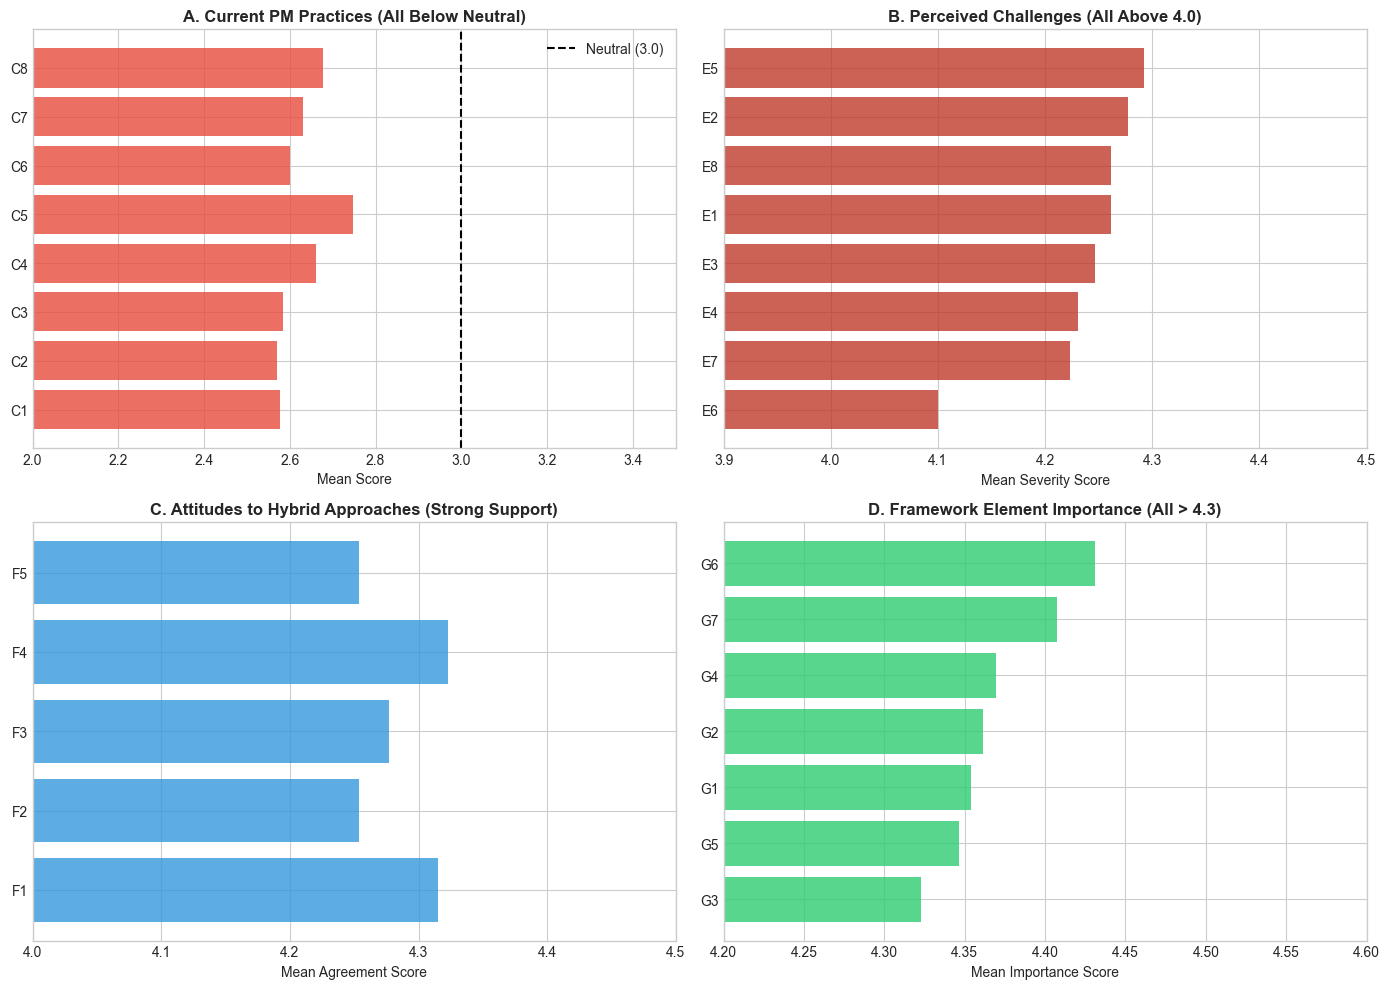

Figure saved as 'fig_key_findings.png'


In [7]:
# Figure 1: Summary of Key Findings
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Panel A: Current PM Practices
c_means = [df[item].mean() for item in c_items]
axes[0, 0].barh(c_items, c_means, color='#e74c3c', alpha=0.8)
axes[0, 0].axvline(x=3.0, color='black', linestyle='--', label='Neutral (3.0)')
axes[0, 0].set_xlabel('Mean Score')
axes[0, 0].set_title('A. Current PM Practices (All Below Neutral)', fontweight='bold')
axes[0, 0].set_xlim(2, 3.5)
axes[0, 0].legend()

# Panel B: Challenges (sorted)
e_means_sorted = sorted([(item, df[item].mean()) for item in e_items], key=lambda x: x[1])
items_sorted, values_sorted = zip(*e_means_sorted)
axes[0, 1].barh(items_sorted, values_sorted, color='#c0392b', alpha=0.8)
axes[0, 1].set_xlabel('Mean Severity Score')
axes[0, 1].set_title('B. Perceived Challenges (All Above 4.0)', fontweight='bold')
axes[0, 1].set_xlim(3.9, 4.5)

# Panel C: Hybrid Attitudes
f_means = [df[item].mean() for item in f_items]
axes[1, 0].barh(f_items, f_means, color='#3498db', alpha=0.8)
axes[1, 0].set_xlabel('Mean Agreement Score')
axes[1, 0].set_title('C. Attitudes to Hybrid Approaches (Strong Support)', fontweight='bold')
axes[1, 0].set_xlim(4.0, 4.5)

# Panel D: Framework Element Importance
g_means_sorted = sorted([(item, df[item].mean()) for item in g_items], key=lambda x: x[1])
items_g, values_g = zip(*g_means_sorted)
axes[1, 1].barh(items_g, values_g, color='#2ecc71', alpha=0.8)
axes[1, 1].set_xlabel('Mean Importance Score')
axes[1, 1].set_title('D. Framework Element Importance (All > 4.3)', fontweight='bold')
axes[1, 1].set_xlim(4.2, 4.6)

plt.tight_layout()
plt.savefig('fig_key_findings.png', dpi=300, bbox_inches='tight')
plt.show()
print("Figure saved as 'fig_key_findings.png'")

## 7. Summary of Key Findings

In [8]:
print("="*70)
print("SUMMARY OF KEY FINDINGS")
print("="*70)

print("\n--- RQ1: Current Practices ---")
print(f"• PM Practices: M={df['C_Overall'].mean():.2f}/5.0 (significantly below neutral)")
print(f"• AI Practices: M={df['D_Overall'].mean():.2f}/5.0 (significantly below neutral)")

print("\n--- RQ2: Key Challenges ---")
print(f"• Overall challenge severity: M={df[e_items].mean(axis=1).mean():.2f}/5.0")
print(f"• Top: E5 Resistance to change (M={df['E5'].mean():.2f})")
print(f"• All challenges rated above 4.0")

print("\n--- RQ3: Hybrid Preference ---")
print(f"• Hybrid preference (F3): M={df['F3'].mean():.2f}/5.0")
print(f"• ANOVA: No significant group differences (consensus)")

print("\n--- RQ4: Framework Elements ---")
print(f"• Overall importance: M={df[g_items].mean(axis=1).mean():.2f}/5.0")
print(f"• Top: G6 Product owner (M={df['G6'].mean():.2f})")

print("\n--- Key Gap ---")
print(f"• Change mgmt recognition: M={df['H4'].mean():.2f}")
print(f"• Actual delivery: M={df['H_Delivery'].mean():.2f}")
print(f"• Gap: {df['H4'].mean() - df['H_Delivery'].mean():.2f} points")

print("\n--- Reliability ---")
for r in reliability_results:
    print(f"• {r['Scale']}: α={r['Alpha']:.3f} ({r['Interpretation']})")

SUMMARY OF KEY FINDINGS

--- RQ1: Current Practices ---
• PM Practices: M=2.63/5.0 (significantly below neutral)
• AI Practices: M=2.54/5.0 (significantly below neutral)

--- RQ2: Key Challenges ---
• Overall challenge severity: M=4.24/5.0
• Top: E5 Resistance to change (M=4.29)
• All challenges rated above 4.0

--- RQ3: Hybrid Preference ---
• Hybrid preference (F3): M=4.28/5.0
• ANOVA: No significant group differences (consensus)

--- RQ4: Framework Elements ---
• Overall importance: M=4.37/5.0
• Top: G6 Product owner (M=4.43)

--- Key Gap ---
• Change mgmt recognition: M=4.53
• Actual delivery: M=2.33
• Gap: 2.20 points

--- Reliability ---
• Section C: Current PM Practices: α=0.819 (Good)
• Section D: AI-Specific Aspects: α=0.713 (Acceptable)
• Section E: Perceived Challenges: α=0.795 (Acceptable)
• Section F: Attitudes to Hybrid: α=0.749 (Acceptable)
• Section G: Framework Elements: α=0.756 (Acceptable)
• Section H: Training & Change Mgmt: α=0.756 (Acceptable)
• Section I: Outcome

---

## Reproducibility Information

**Paper:** Paul, S., Das, A., & Chowdhury, S. (2026). Bridging the Bureaucracy-Agility Divide: A Hybrid Framework for AI-Driven Customs Modernisation in Bangladesh. *Cogent Business & Management*.

**Data:**
- Sample size: N=130 stakeholders
- Survey instrument: 10 sections (A-J), 49 items
- Collection period: October-November 2024

**Software:** Python 3.x with pandas, numpy, scipy, matplotlib, seaborn

**Contact:** shoumyac@student.unimelb.edu.au